In [2]:
# load libraries
import numpy as np
import pandas as pd

In [3]:
from rdkit import Chem

## Reading molecules
https://pubchem.ncbi.nlm.nih.gov/compound/Caffeine

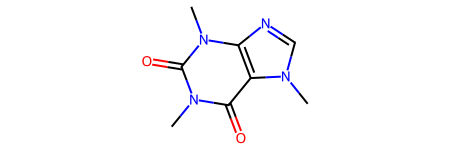

In [4]:
# SMILES
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
caffeine

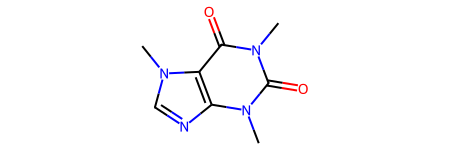

In [5]:
# SMILES
caffeine_inchi = Chem.inchi.MolFromInchi("InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3")
caffeine_inchi

## Writing molecules
Molecules can be written as a molfile text. The molfiles from different compounds can then be combined into an SDFile (structure data files)

In [6]:
smiles = Chem.MolToSmiles(caffeine)
smiles

'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

In [7]:
print(Chem.MolToMolBlock(caffeine))
print(Chem.MolToMolBlock(caffeine),file=open('caffeine.mol','w+'))


     RDKit          2D

 14 15  0  0  0  0  0  0  0  0999 V2000
    2.7760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2760    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943   -1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7062   -2.6807    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1328   -3.1443    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4086   -3.6844    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8351   -3.2209    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9499   -4.2246    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1470   -1.7537    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5736   -1.2902    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0967   -5.1517    0

lets write another molecule as molfile format - https://pubchem.ncbi.nlm.nih.gov/compound/79050

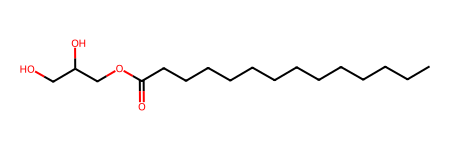

In [8]:
# SMILES for monomyristin
monomyristin = Chem.MolFromSmiles('CCCCCCCCCCCCCC(=O)OCC(CO)O')
monomyristin

In [9]:
print(Chem.MolToMolBlock(monomyristin))
monomyristin.SetProp("_Name","monomyristin")
print(Chem.MolToMolBlock(monomyristin),file=open('monomyristin.mol','w+'))


     RDKit          2D

 21 20  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4952    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7942   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    9.0933    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.3923   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   11.6913    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   12.9904   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   14.2894    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   15.5885   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   16.8875    0.7500    0

Lets combine the two molecules and write in one SDFile

In [10]:
mols = [caffeine, monomyristin]

In [11]:
with Chem.SDWriter('molecules.sdf') as w:
  for m in mols:
    w.write(m)

What if now we want to read the molecules from SDFile?

In [12]:
suppl = Chem.SDMolSupplier('molecules.sdf')
# suppl[0]
# suppl[1]


In [13]:
from rdkit.Chem import Draw
Draw.MolToFile(suppl[0],'caffeine.png')    
Draw.MolToFile(suppl[1],'monomyristin.png')

## Molecular Properties

In [14]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300

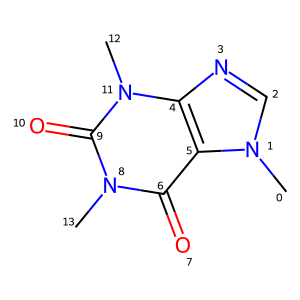

In [15]:
caffeine_indices = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
caffeine_indices

In [16]:
# atomic number of atoms
for atom in caffeine_indices.GetAtoms():
  print(atom.GetAtomicNum())

6
7
6
7
6
6
6
8
7
6
8
7
6
6


In [17]:
# total number of atoms
caffeine_indices.GetNumAtoms()

14

In [18]:
# is this atom in the ring????
caffeine_indices.GetAtomWithIdx(13).IsInRing()
# and much more to explore

False

In [19]:
from rdkit.Chem import Descriptors

In [20]:
Descriptors.MolWt(caffeine_indices)

194.194

In [21]:
Descriptors.NumRotatableBonds(caffeine_indices)

0

## Find MCS (Maximum Common Substructure)

In [22]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.molSize = 600,400
IPythonConsole.ipython_useSVG = True

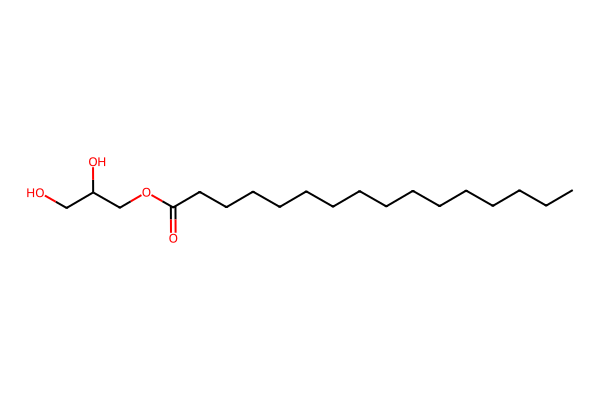

In [23]:
monopalmitin = Chem.MolFromSmiles("CCCCCCCCCCCCCCCC(=O)OCC(CO)O")
monopalmitin

In [26]:
mols_lipids = [monomyristin, monopalmitin]

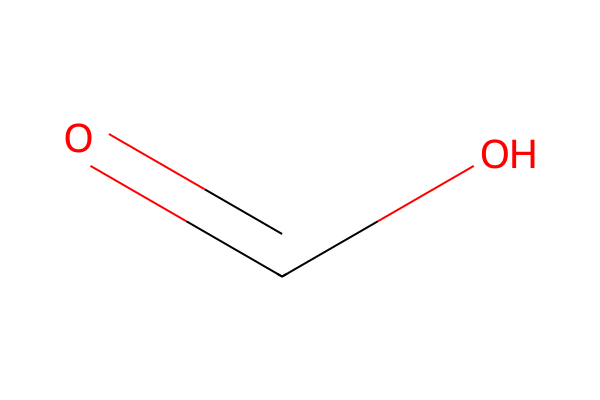

In [24]:
# SMILES for substructure
Chem.MolFromSmiles("C(=O)O")
#Chem.MolFromSmiles("C=O")

In [27]:
pattern = Chem.MolFromSmiles("C(=O)O")
for mol in mols_lipids:
    print(mol.HasSubstructMatch(pattern))

True
True


#### maximum common substructure

In [28]:
from rdkit.Chem import rdFMCS
res=rdFMCS.FindMCS(mols_lipids)

https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html#:~:text=4.7%20SMARTS%20Versus%20SMILES,when%20used%20as%20a%20SMARTS.

In [29]:
sm_mol = Chem.MolFromSmarts(res.smartsString)
Chem.MolToSmiles(sm_mol)

'CCCCCCCCCCCCCC(=O)OCC(O)CO'

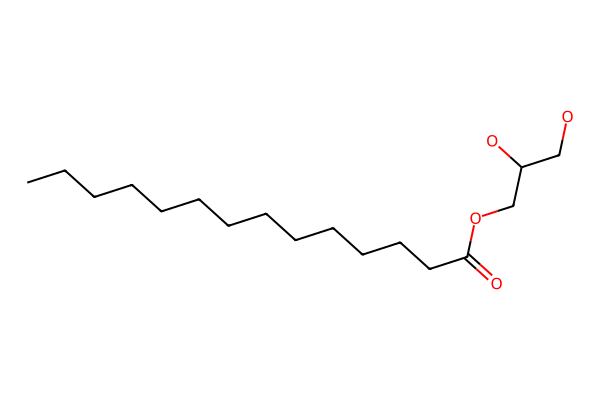

In [30]:
sm_mol

## Chemical Similarity using Molecular Fingerprints

In [31]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

In [37]:
# empty dictionary to store bits
bi = {}
# generate fingerprints from mol
fp_mols = AllChem.GetMorganFingerprintAsBitVect(monomyristin, 2, nBits=2048, bitInfo = bi)

In [38]:
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp_mols, fp_arr)
fp_arr
#np.nonzero(fp_arr)

array([0., 1., 0., ..., 0., 0., 0.])

In [39]:
list(fp_mols.GetOnBits())

[1,
 80,
 118,
 147,
 222,
 227,
 294,
 482,
 523,
 526,
 591,
 650,
 677,
 695,
 729,
 794,
 807,
 1057,
 1143,
 1267,
 1386,
 1399,
 1444,
 1564,
 1911,
 1917,
 1977,
 2038]

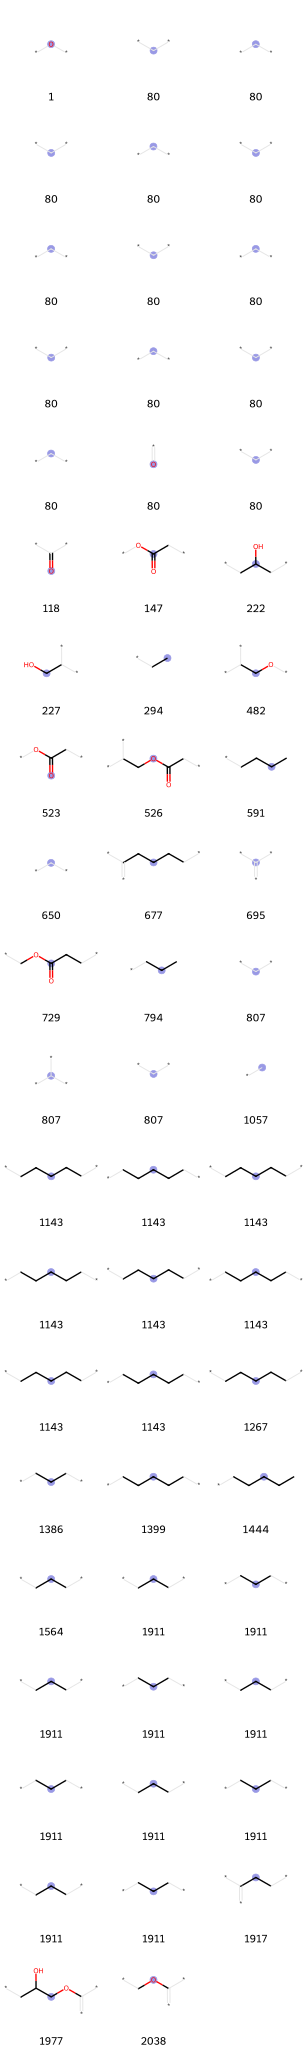

In [40]:
list_bits = []
legends = []
for x in fp_mols.GetOnBits():
    for i in range(len(bi[x])):
        list_bits.append((mol,x,bi,i))
        legends.append(str(x))
Draw.DrawMorganBits(list_bits,legends=legends)  

### Tanimoto Similarity Score

In [41]:
# all mol objects
all_mols = [caffeine, monomyristin, monopalmitin]
# generate fingerprints from mol
fp_mols = [AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048, bitInfo = bi) for mol1 in all_mols]

In [43]:
list(fp_mols[0].GetOnBits())

[33,
 314,
 378,
 400,
 463,
 504,
 564,
 650,
 771,
 932,
 935,
 1024,
 1057,
 1145,
 1203,
 1258,
 1307,
 1354,
 1380,
 1409,
 1440,
 1452,
 1517,
 1696,
 1873]

In [45]:
list(fp_mols[1].GetOnBits())

[1,
 80,
 118,
 147,
 222,
 227,
 294,
 482,
 523,
 526,
 591,
 650,
 677,
 695,
 729,
 794,
 807,
 1057,
 1143,
 1267,
 1386,
 1399,
 1444,
 1564,
 1911,
 1917,
 1977,
 2038]

In [47]:
common = set(fp_mols[0].GetOnBits()) & set(fp_mols[1].GetOnBits())
print(common)
combined = set(fp_mols[0].GetOnBits()) | set(fp_mols[1].GetOnBits())
print(combined)

print(len(common)/len(combined))

{1057, 650}
{1024, 1409, 1, 771, 650, 523, 526, 400, 147, 794, 1307, 1564, 1440, 33, 1057, 1696, 932, 1444, 677, 935, 294, 807, 1452, 1203, 564, 695, 1977, 314, 1354, 463, 591, 1873, 80, 1143, 729, 222, 482, 227, 1380, 1258, 1386, 1517, 1267, 118, 1911, 504, 1145, 378, 2038, 1917, 1399}
0.0392156862745098


In [50]:
tanimoto_score = DataStructs.FingerprintSimilarity(fp_mols[0], fp_mols[1])
tanimoto_score

0.0392156862745098